# Data exploration and decision modeling with decision tree

## Loading customer delinquency data

In [1]:
import pandas as pd

df = pd.read_csv('./data/Delinquent_customer-Insurance_Premium.csv')

display(df)

,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,GENDER,MARITAL_STATUS,RESIDENTIAL_PHONE,RESIDENCE_TYPE,EMAIL,PROFESSIONAL_PHONE,PROFESSION_CODE,OCCUPATION_TYPE,...,QUANT_DEPENDANTS,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,QUANT_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,MONTHS_IN_THE_JOB,AGE,TARGET_LABEL
0,Web,1,F,6,Y,1.0,1,N,9.0,4.0,...,1,15,900.00,0.0,0,0.0,0,0,32,1
1,Paper,1,F,2,Y,1.0,1,N,11.0,4.0,...,0,1,750.00,0.0,0,0.0,0,0,34,1
2,Web,1,F,2,Y,1.0,1,N,11.0,NaN,...,0,10,500.00,0.0,0,0.0,0,0,27,0
3,Web,1,F,2,N,NaN,1,N,NaN,NaN,...,0,10,500.00,0.0,0,0.0,0,0,61,0
4,Web,1,M,2,Y,1.0,1,N,9.0,5.0,...,0,12,1200.00,0.0,0,0.0,0,0,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,1,F,1,Y,1.0,1,N,9.0,4.0,...,2,14,1451.00,0.0,1,0.0,1,0,36,1
49996,0,1,F,1,Y,1.0,1,N,NaN,NaN,...,0,15,450.00,0.0,0,0.0,0,0,21,0
49997,Web,1,M,2,Y,2.0,1,Y,9.0,2.0,...,3,5,1555.00,0.0,0,0.0,0,0,41,0
49998,Web,1,F,1,Y,1.0,1,Y,9.0,2.0,...,1,10,1443.27,0.0,0,0.0,0,0,28,1


## Identifying column types

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   APPLICATION_SUBMISSION_TYPE  50000 non-null  object 
 1   POSTAL_ADDRESS_TYPE          50000 non-null  int64  
 2   GENDER                       49983 non-null  object 
 3   MARITAL_STATUS               50000 non-null  int64  
 4   RESIDENTIAL_PHONE            50000 non-null  object 
 5   RESIDENCE_TYPE               48651 non-null  float64
 6   EMAIL                        50000 non-null  int64  
 7   PROFESSIONAL_PHONE           50000 non-null  object 
 8   PROFESSION_CODE              42244 non-null  float64
 9   OCCUPATION_TYPE              42687 non-null  float64
 10  PRODUCT                      50000 non-null  int64  
 11  QUANT_ADDITIONAL_CARDS       50000 non-null  int64  
 12  QUANT_DEPENDANTS             50000 non-null  int64  
 13  MONTHS_IN_RESIDE

## Identifying and deleting unrelated columns

In [3]:
# Remove unrelated data

df = df.drop(columns=["APPLICATION_SUBMISSION_TYPE", 
                 "POSTAL_ADDRESS_TYPE", 
                 "RESIDENTIAL_PHONE", 
                 "EMAIL", 
                 "PROFESSIONAL_PHONE",
                 "MONTHS_IN_RESIDENCE",
                 "OTHER_INCOMES",
                 "PERSONAL_ASSETS_VALUE",
                 "QUANT_CARS",
                 "MONTHS_IN_THE_JOB"])

df

,GENDER,MARITAL_STATUS,RESIDENCE_TYPE,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,QUANT_ADDITIONAL_CARDS,QUANT_DEPENDANTS,PERSONAL_MONTHLY_INCOME,QUANT_BANKING_ACCOUNTS,AGE,TARGET_LABEL
0,F,6,1.0,9.0,4.0,1,0,1,900.00,0,32,1
1,F,2,1.0,11.0,4.0,1,0,0,750.00,0,34,1
2,F,2,1.0,11.0,NaN,1,0,0,500.00,0,27,0
3,F,2,NaN,NaN,NaN,1,0,0,500.00,0,61,0
4,M,2,1.0,9.0,5.0,1,0,0,1200.00,0,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,F,1,1.0,9.0,4.0,1,0,2,1451.00,1,36,1
49996,F,1,1.0,NaN,NaN,2,0,0,450.00,0,21,0
49997,M,2,2.0,9.0,2.0,1,0,3,1555.00,0,41,0
49998,F,1,1.0,9.0,2.0,1,0,1,1443.27,0,28,1


## Looking for missing data

In [4]:
#print(df.isna())
df.isna().sum()

GENDER                       17
MARITAL_STATUS                0
RESIDENCE_TYPE             1349
PROFESSION_CODE            7756
OCCUPATION_TYPE            7313
PRODUCT                       0
QUANT_ADDITIONAL_CARDS        0
QUANT_DEPENDANTS              0
PERSONAL_MONTHLY_INCOME       0
QUANT_BANKING_ACCOUNTS        0
AGE                           0
TARGET_LABEL                  0
dtype: int64

In [5]:
df.isnull().sum()

GENDER                       17
MARITAL_STATUS                0
RESIDENCE_TYPE             1349
PROFESSION_CODE            7756
OCCUPATION_TYPE            7313
PRODUCT                       0
QUANT_ADDITIONAL_CARDS        0
QUANT_DEPENDANTS              0
PERSONAL_MONTHLY_INCOME       0
QUANT_BANKING_ACCOUNTS        0
AGE                           0
TARGET_LABEL                  0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GENDER                   49983 non-null  object 
 1   MARITAL_STATUS           50000 non-null  int64  
 2   RESIDENCE_TYPE           48651 non-null  float64
 3   PROFESSION_CODE          42244 non-null  float64
 4   OCCUPATION_TYPE          42687 non-null  float64
 5   PRODUCT                  50000 non-null  int64  
 6   QUANT_ADDITIONAL_CARDS   50000 non-null  int64  
 7   QUANT_DEPENDANTS         50000 non-null  int64  
 8   PERSONAL_MONTHLY_INCOME  50000 non-null  float64
 9   QUANT_BANKING_ACCOUNTS   50000 non-null  int64  
 10  AGE                      50000 non-null  int64  
 11  TARGET_LABEL             50000 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 4.6+ MB


In [7]:
# If the data requires to be numerical

# '''
df['MARITAL_STATUS_NUM'] = pd.Categorical(df['MARITAL_STATUS']).codes

# similarly, convet the all categorical data to numeric data
df['GENDER'] = pd.Categorical(df['GENDER']).codes


df
#'''

,GENDER,MARITAL_STATUS,RESIDENCE_TYPE,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,QUANT_ADDITIONAL_CARDS,QUANT_DEPENDANTS,PERSONAL_MONTHLY_INCOME,QUANT_BANKING_ACCOUNTS,AGE,TARGET_LABEL,MARITAL_STATUS_NUM
0,0,6,1.0,9.0,4.0,1,0,1,900.00,0,32,1,6
1,0,2,1.0,11.0,4.0,1,0,0,750.00,0,34,1,2
2,0,2,1.0,11.0,NaN,1,0,0,500.00,0,27,0,2
3,0,2,NaN,NaN,NaN,1,0,0,500.00,0,61,0,2
4,1,2,1.0,9.0,5.0,1,0,0,1200.00,0,48,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,1,1.0,9.0,4.0,1,0,2,1451.00,1,36,1,1
49996,0,1,1.0,NaN,NaN,2,0,0,450.00,0,21,0,1
49997,1,2,2.0,9.0,2.0,1,0,3,1555.00,0,41,0,2
49998,0,1,1.0,9.0,2.0,1,0,1,1443.27,0,28,1,1


## Dealing with missing values

* For categorical data, replace with 'mode' of the data
* For numerical data, replace with 'mean' of the data

In [8]:
df['GENDER'] = df['GENDER'].fillna(df['GENDER'].mode()[0])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GENDER                   50000 non-null  int8   
 1   MARITAL_STATUS           50000 non-null  int64  
 2   RESIDENCE_TYPE           48651 non-null  float64
 3   PROFESSION_CODE          42244 non-null  float64
 4   OCCUPATION_TYPE          42687 non-null  float64
 5   PRODUCT                  50000 non-null  int64  
 6   QUANT_ADDITIONAL_CARDS   50000 non-null  int64  
 7   QUANT_DEPENDANTS         50000 non-null  int64  
 8   PERSONAL_MONTHLY_INCOME  50000 non-null  float64
 9   QUANT_BANKING_ACCOUNTS   50000 non-null  int64  
 10  AGE                      50000 non-null  int64  
 11  TARGET_LABEL             50000 non-null  int64  
 12  MARITAL_STATUS_NUM       50000 non-null  int8   
dtypes: float64(4), int64(7), int8(2)
memory usage: 4.3 MB


In [10]:
# Fill all missing data
df['RESIDENCE_TYPE'] = df['RESIDENCE_TYPE'].fillna(df['RESIDENCE_TYPE'].mode()[0])
df['PROFESSION_CODE'] = df['PROFESSION_CODE'].fillna(df['PROFESSION_CODE'].mode()[0])
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].mode()[0])

In [11]:
# Still, we can see that the 'QUANT_ADDITIONAL_CARDS' does not have any correlation with rest of the attributes.
# Therefore, it can be removed.
df = df.drop(columns=["QUANT_ADDITIONAL_CARDS"])

In [12]:
df = df.drop(columns=['MARITAL_STATUS'])

## Correlation of the variables

In [13]:
df.corr()

,GENDER,RESIDENCE_TYPE,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,QUANT_DEPENDANTS,PERSONAL_MONTHLY_INCOME,QUANT_BANKING_ACCOUNTS,AGE,TARGET_LABEL,MARITAL_STATUS_NUM
GENDER,1.000000,0.037588,0.043205,-0.056479,0.002279,0.048552,0.006728,0.001555,-0.003467,0.022623,-0.043330
RESIDENCE_TYPE,0.037588,1.000000,0.032617,-0.006117,0.001745,-0.004957,-0.004612,-0.009144,-0.103862,0.019106,0.001429
PROFESSION_CODE,0.043205,0.032617,1.000000,0.147710,-0.017511,0.013777,-0.006915,-0.274855,-0.017606,-0.010483,-0.002828
OCCUPATION_TYPE,-0.056479,-0.006117,0.147710,1.000000,0.004160,0.027155,0.002350,-0.112325,-0.223130,0.036119,-0.065605
PRODUCT,0.002279,0.001745,-0.017511,0.004160,1.000000,0.009623,-0.001967,0.027078,-0.001512,0.019293,0.010545
QUANT_DEPENDANTS,0.048552,-0.004957,0.013777,0.027155,0.009623,1.000000,0.008035,0.028553,-0.037415,0.012157,0.037646
PERSONAL_MONTHLY_INCOME,0.006728,-0.004612,-0.006915,0.002350,-0.001967,0.008035,1.000000,0.011384,0.004820,0.002819,-0.000311
QUANT_BANKING_ACCOUNTS,0.001555,-0.009144,-0.274855,-0.112325,0.027078,0.028553,0.011384,1.000000,0.024150,0.011997,0.006515
AGE,-0.003467,-0.103862,-0.017606,-0.223130,-0.001512,-0.037415,0.004820,0.024150,1.000000,-0.107886,0.237030
TARGET_LABEL,0.022623,0.019106,-0.010483,0.036119,0.019293,0.012157,0.002819,0.011997,-0.107886,1.000000,-0.030380


Text(0.5, 1.0, 'Correlation Matrix')

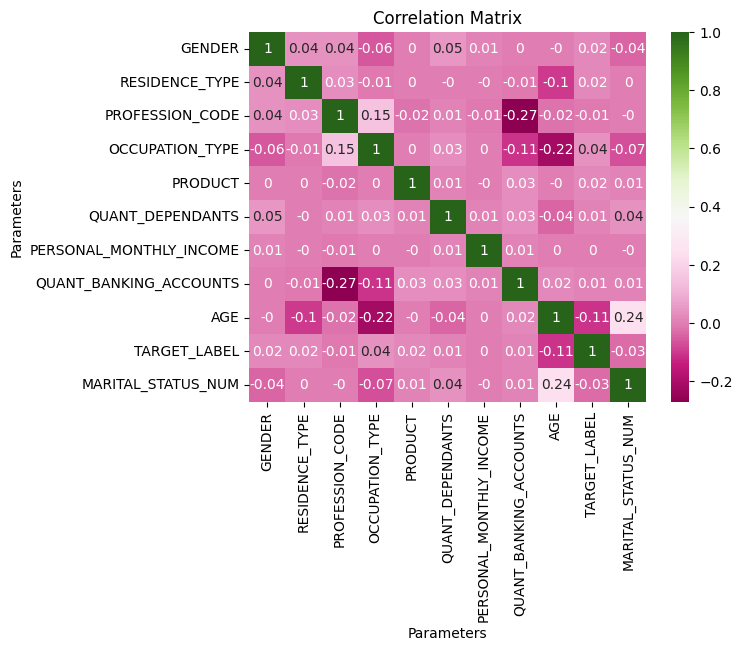

In [14]:
# Visualizing the correlation with seaborn

import seaborn as sns
import matplotlib.pyplot as plt

classes = list(df)
xticklabels = classes
yticklabels = classes

ax= plt.subplot()

# annot=True to annotate cells, 
# ftm='g' to disable scientific notation
sns.heatmap(df.corr().round(2), 
            annot=True, fmt='g', ax=ax, 
            xticklabels=xticklabels, 
            yticklabels=yticklabels,
           cmap="PiYG");  

# labels, title and ticks
ax.set_xlabel('Parameters')
ax.set_ylabel('Parameters')
ax.set_title('Correlation Matrix')

## Readying data frame for machine learning

In [15]:
y = df['TARGET_LABEL'].to_numpy()

df=df.drop(columns=['TARGET_LABEL'])

X = df.to_numpy()

print(X[:5])
print(y[:5])

[[0.0e+00 1.0e+00 9.0e+00 4.0e+00 1.0e+00 1.0e+00 9.0e+02 0.0e+00 3.2e+01
  6.0e+00]
 [0.0e+00 1.0e+00 1.1e+01 4.0e+00 1.0e+00 0.0e+00 7.5e+02 0.0e+00 3.4e+01
  2.0e+00]
 [0.0e+00 1.0e+00 1.1e+01 2.0e+00 1.0e+00 0.0e+00 5.0e+02 0.0e+00 2.7e+01
  2.0e+00]
 [0.0e+00 1.0e+00 9.0e+00 2.0e+00 1.0e+00 0.0e+00 5.0e+02 0.0e+00 6.1e+01
  2.0e+00]
 [1.0e+00 1.0e+00 9.0e+00 5.0e+00 1.0e+00 0.0e+00 1.2e+03 0.0e+00 4.8e+01
  2.0e+00]]
[1 1 0 0 1]


## Building a decision tree

[Text(0.5, 0.875, 'x[8] <= 46.5\ngini = 0.386\nsamples = 50000\nvalue = [36959, 13041]'),
 Text(0.25, 0.625, 'x[8] <= 32.5\ngini = 0.416\nsamples = 30869\nvalue = [21756, 9113]'),
 Text(0.125, 0.375, 'x[8] <= 20.5\ngini = 0.44\nsamples = 13801\nvalue = [9298, 4503]'),
 Text(0.0625, 0.125, 'gini = 0.478\nsamples = 1756\nvalue = [1061, 695]'),
 Text(0.1875, 0.125, 'gini = 0.432\nsamples = 12045\nvalue = [8237, 3808]'),
 Text(0.375, 0.375, 'x[9] <= 1.5\ngini = 0.394\nsamples = 17068\nvalue = [12458, 4610]'),
 Text(0.3125, 0.125, 'gini = 0.42\nsamples = 5063\nvalue = [3545, 1518]'),
 Text(0.4375, 0.125, 'gini = 0.382\nsamples = 12005\nvalue = [8913, 3092]'),
 Text(0.75, 0.625, 'x[8] <= 82.5\ngini = 0.326\nsamples = 19131\nvalue = [15203, 3928]'),
 Text(0.625, 0.375, 'x[8] <= 54.5\ngini = 0.323\nsamples = 18832\nvalue = [15021, 3811]'),
 Text(0.5625, 0.125, 'gini = 0.355\nsamples = 7448\nvalue = [5732, 1716]'),
 Text(0.6875, 0.125, 'gini = 0.3\nsamples = 11384\nvalue = [9289, 2095]'),
 Text

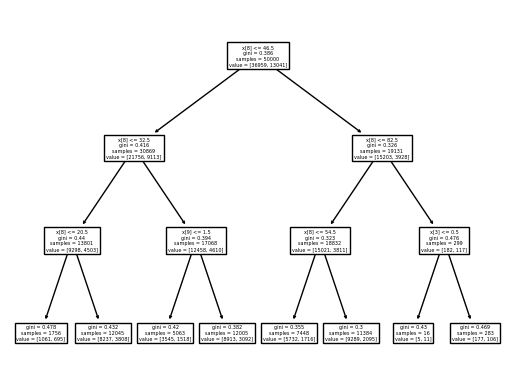

In [16]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3)
clf = clf.fit(X, y)

tree.plot_tree(clf)

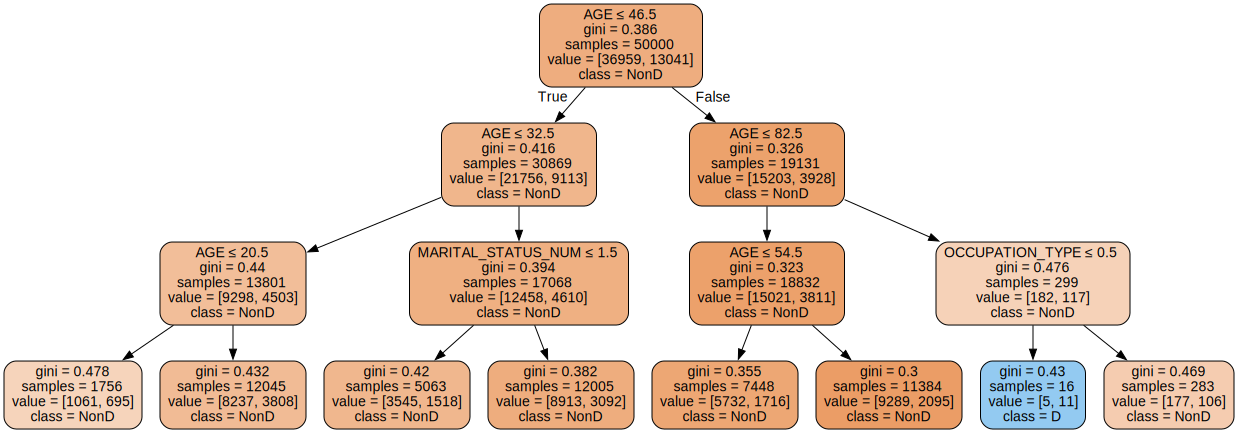

In [17]:
# Visualizing the decision-tree with proper labels
import graphviz

feature_names = list(df)
class_names= ['NonD', 'D']
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,
                                class_names=class_names,
                                filled=True, 
                                rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [19]:
# saving the graph
graph.render("decision-tree-delinquency", format="png")

'decision-tree-delinquency.png'